In [4]:
# Importar as bibliotecas necessarias
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

In [5]:
## Ativos escolhidos e período selecionado

ativos = ['ITUB4.SA', 'PETR4.SA', 'BBDC4.SA', 'PETR3.SA', 'ABEV3.SA', 'MGLU3.SA', 'WEGE3.SA', 'BBAS3.SA', \
        'ITSA4.SA', 'JBSS3.SA', 'VALE3.SA', 'SUZB3.SA', 'NTCO3.SA', 'LREN3.SA', 'RENT3.SA', \
        'BBDC3.SA', 'EQTL3.SA', 'RAIL3.SA', 'RADL3.SA', 'UGPA3.SA', 'BPAC11.SA', 'SBSP3.SA', 'GGBR4.SA', \
        'BBSE3.SA', 'BRFS3.SA', 'KLBN11.SA', 'CCRO3.SA', 'HAPV3.SA', 'HYPE3.SA', 'COGN3.SA', 'CSAN3.SA', \
        'ELET3.SA', 'ENGI11.SA', 'TOTS3.SA', 'EGIE3.SA', 'SANB11.SA', 'CMIG4.SA', 'PCAR3.SA', 'BRAP4.SA', 'IRBR3.SA', \
        'YDUQ3.SA', 'CSNA3.SA', 'ELET6.SA', 'QUAL3.SA', 'CRFB3.SA', 'FLRY3.SA', 'AZUL4.SA', 'CYRE3.SA', 'MRFG3.SA', \
        'TAEE11.SA', 'BRKM5.SA', 'MULT3.SA', 'EMBR3.SA', 'CIEL3.SA', 'GOAU4.SA', 'MRVE3.SA', 'ENBR3.SA', 'CPFE3.SA', 'USIM5.SA', \
        'BEEF3.SA', 'CVCB3.SA', 'GOLL4.SA', 'ECOR3.SA']

dataInicial = '2019-01-01'
dataFinal = '2022-08-01'

data = yf.download(ativos, dataInicial, dataFinal)['Close'] # Baixar os dados de preço



# Cria a lista de retornos de treino e teste
retData_train = data.pct_change()[1:int(len(data)*0.6)]
retData_test = data.pct_change()[int(len(data)*0.6):]

[*********************100%***********************]  63 of 63 completed


In [6]:
data.head()

,ABEV3.SA,AZUL4.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BPAC11.SA,BRAP4.SA,BRFS3.SA,...,SANB11.SA,SBSP3.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,16.150000,36.330002,48.599998,22.395441,25.288004,28.320000,4.995137,6.2250,27.525454,22.379999,...,45.740002,34.369999,38.599998,24.209999,9.531889,27.170000,9.76,51.090000,8.990,24.850000
2019-01-03,16.330000,36.369999,48.799999,22.852491,25.532181,28.629999,5.113132,6.4825,26.471889,21.490000,...,47.250000,37.020000,36.950001,24.280001,9.751472,26.665001,9.55,49.000000,9.195,24.830000
2019-01-04,16.549999,36.250000,48.799999,22.351616,25.331829,28.350000,5.309791,6.7125,28.260292,21.450001,...,47.200001,37.860001,37.570000,25.240000,10.020960,26.485001,10.11,52.189999,9.300,25.209999
2019-01-07,16.480000,35.299999,48.480000,22.539444,25.632357,27.930000,5.280293,6.8500,28.481628,21.590000,...,47.990002,37.000000,35.849998,24.820000,9.804704,25.674999,10.13,51.910000,9.155,24.709999
2019-01-08,16.150000,34.720001,47.930000,22.789883,25.788879,27.520000,5.221295,6.5525,28.278000,22.930000,...,46.360001,37.139999,36.200001,24.799999,9.405462,25.250000,9.77,52.410000,9.080,24.940001


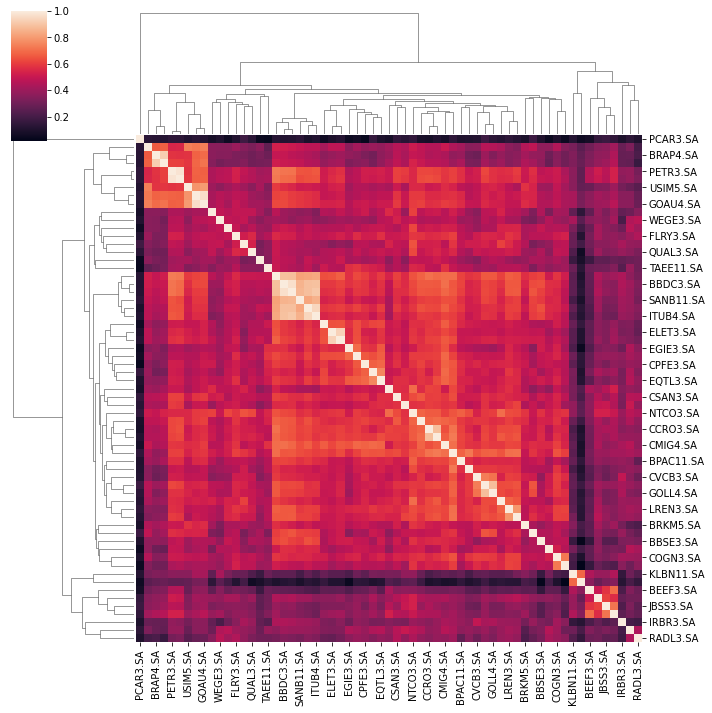

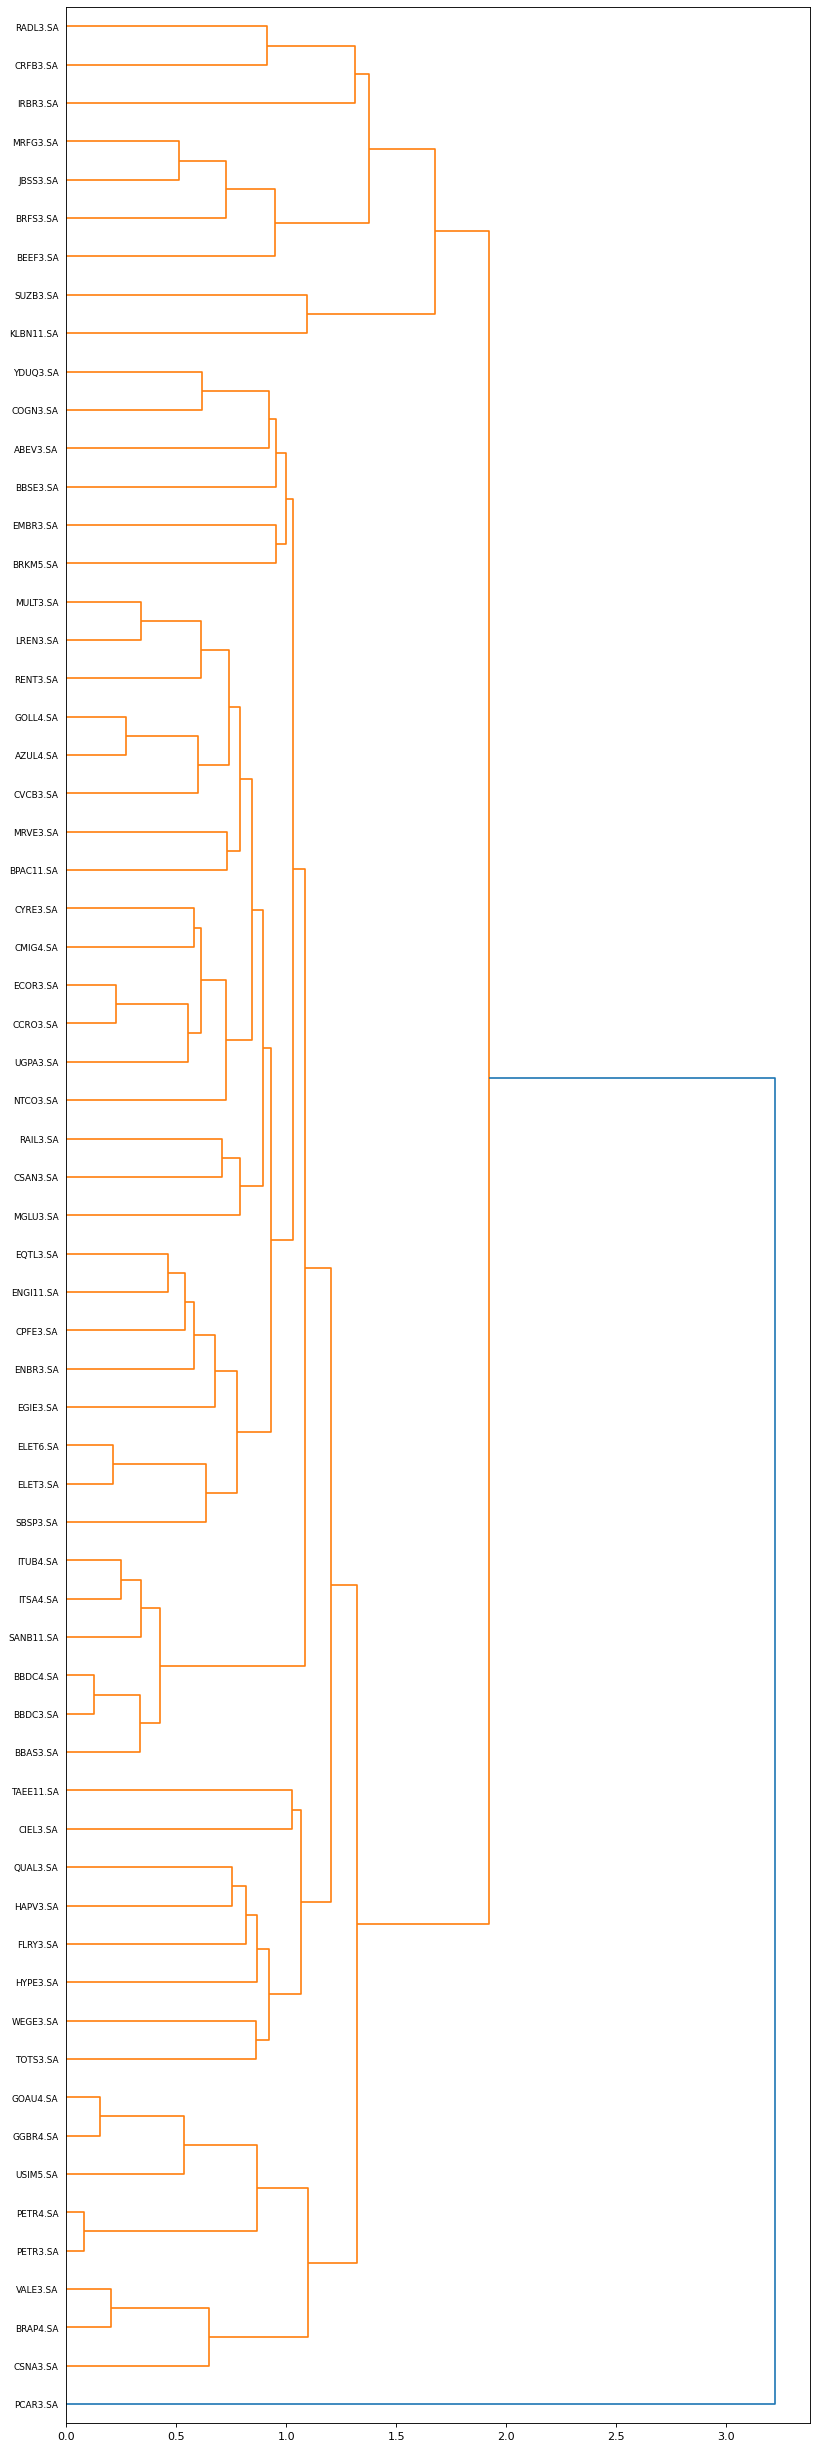

In [7]:
retData_train.corr() # Matriz de correlação dos retornos
# Matriz de correlação em heatmap e Dendrograma
h = sns.clustermap(retData_train.corr())
h
plt.show();
dgram = h.dendrogram_col.dendrogram
row_linkage = h.dendrogram_row.linkage
plt.figure(figsize=(12, 40), dpi=80)
dn = dendrogram(row_linkage, labels = retData_train.columns, orientation='right', leaf_font_size=8)

In [8]:
def cleanMatrix(retData):

  m = len(retData.T)
  n = len(retData)
  lambda_p = (1+np.sqrt(m/n))**2

  corr = retData.corr()
  eig = np.linalg.eig(corr)
  eigva = eig[0]
  eigve = eig[1]

  cutoff = len(eigva[eigva > lambda_p])


  eigva[cutoff:] = sum(eigva[cutoff:])/len(eigva[cutoff:])

  corr = np.matmul(eigve, np.matmul(np.diag(eigva),eigve.T))

  return pd.DataFrame(corr, index=retData.columns, columns=retData.columns)

In [9]:
# Lopez de Prado 2020

def cov2corr(cov):
  # Derive the correlation matrix from a covariance matrix
  std=np.sqrt(np.diag(cov))
  corr=cov/np.outer(std,std)
  corr[corr<-1],corr[corr>1]=-1,1 # numerical error
  return corr

In [37]:
## Pesos e desvio Padrão do Portfólio de Variância Mínima

def minVarPort(CorrelMatrix, standDevi):

  # https://bookdown.org/compfinezbook/introcompfinr/Determining-the-Global.html
  # Transforma o desvio padrão e matriz de correlação em matriz de covâriancia
  covMatrix = np.matmul(np.diag(standDevi*np.sqrt(252)),np.matmul(CorrelMatrix,np.diag(standDevi*np.sqrt(252))))  
  
  newCov = 2*covMatrix.copy()
  newCov.loc[-1] = np.ones(len(covMatrix)) 
  newCov['one'] = np.append(np.ones(len(covMatrix)), 0)

  b = np.append(np.zeros(len(covMatrix)), 1)
  w = np.matmul(np.linalg.inv(newCov),b.T)[:-1]
  std = np.sqrt(np.matmul(w.T,np.matmul(covMatrix,w)))

  return w, std

In [38]:
def detonMatrix(retData):

  m = len(retData.T)
  n = len(retData)
  lambda_p = (1+np.sqrt(m/n))**2

  corr = retData.corr()
  eig = np.linalg.eig(corr)
  eigva = eig[0][1:]
  eigve = eig[1].T[1:].T

  corr = np.matmul(eigve, np.matmul(np.diag(eigva),eigve.T))

  return pd.DataFrame(corr, index=retData.columns, columns=retData.columns)

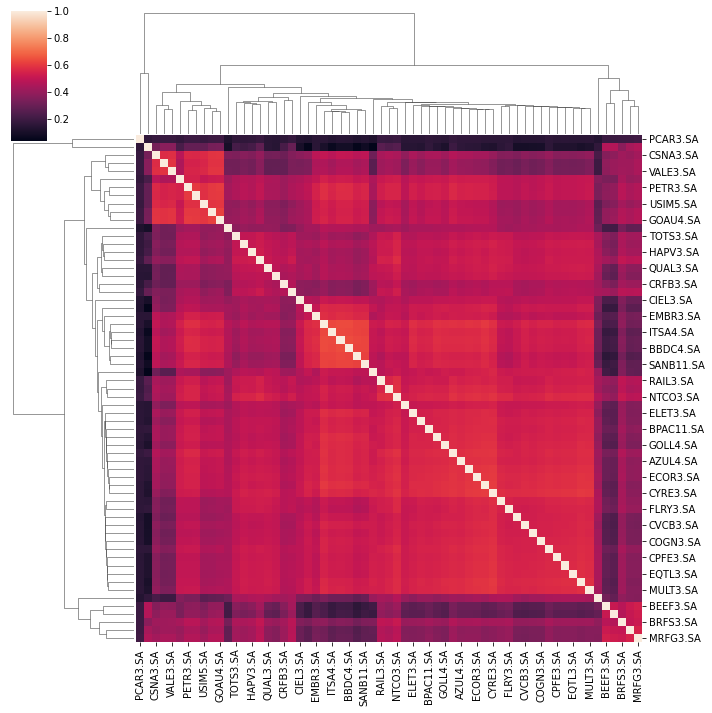

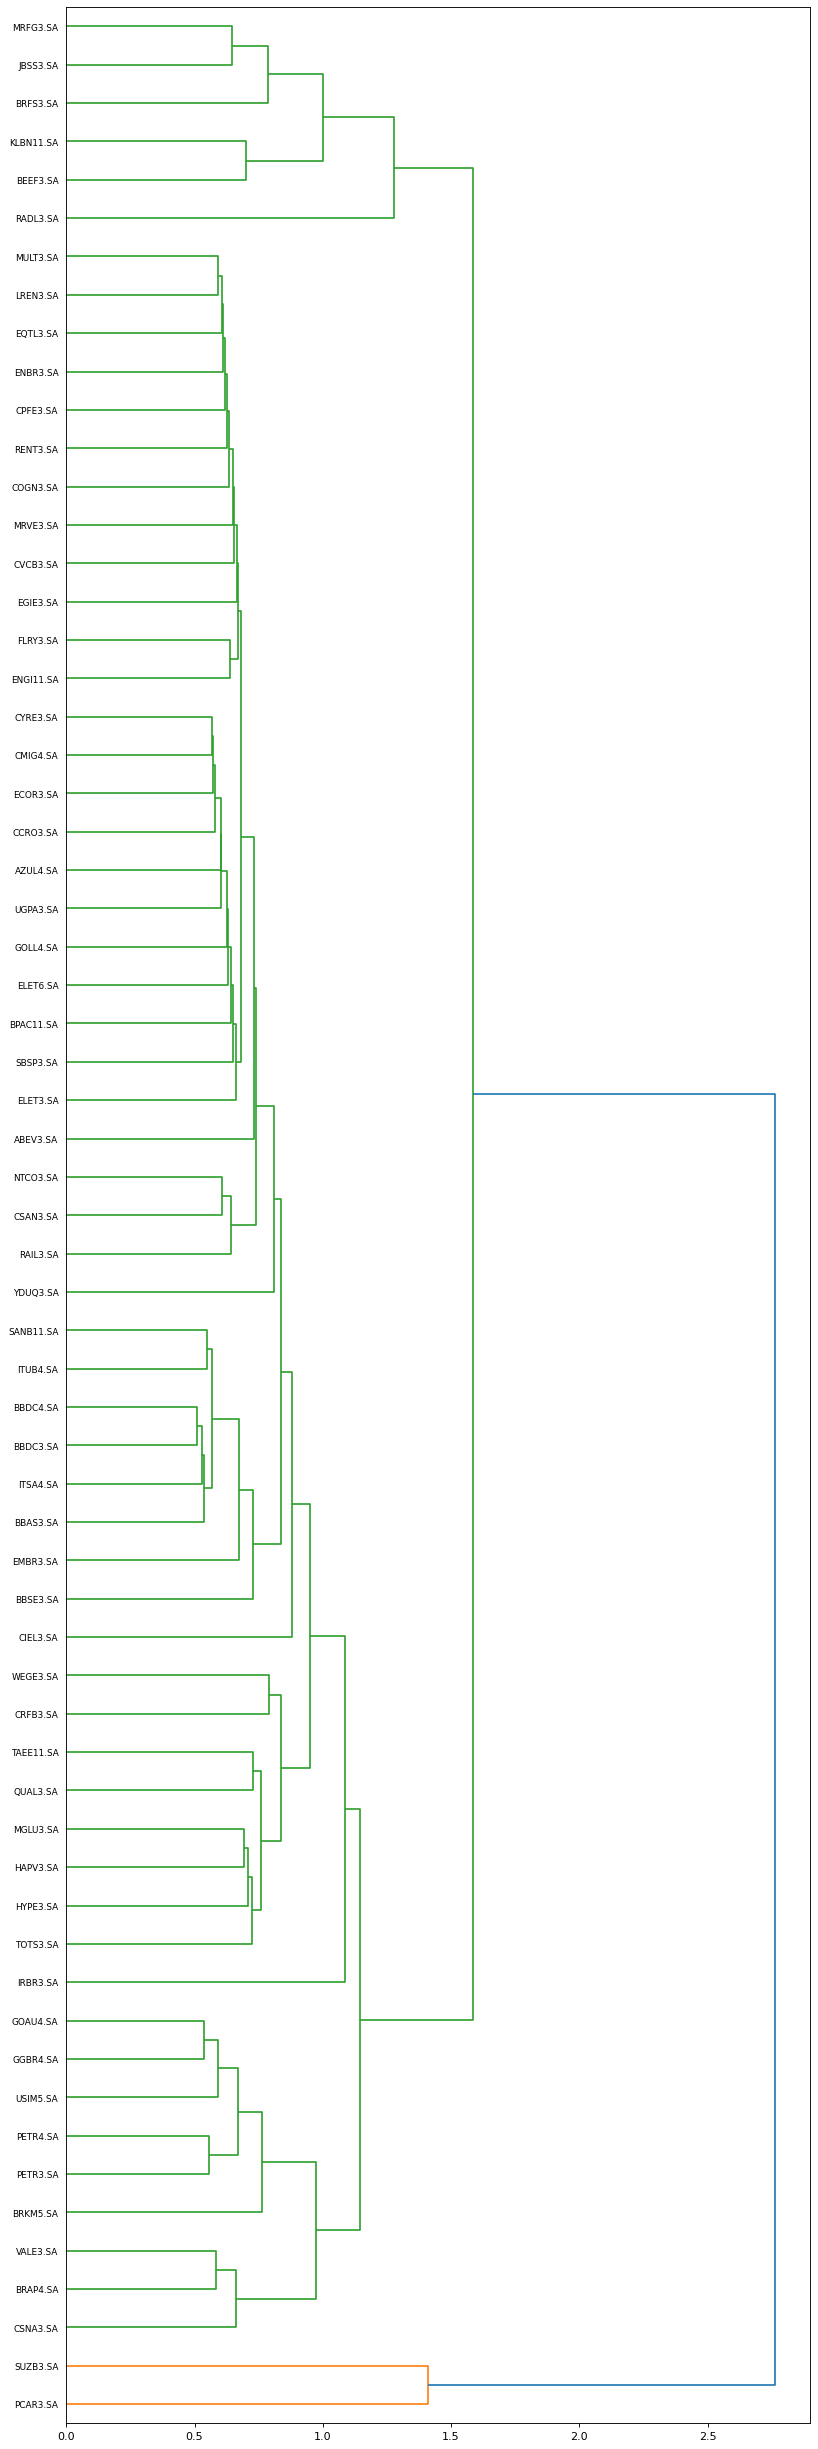

In [39]:
newCorrel = cov2corr(cleanMatrix(retData_train)) # Não é uma matriz de correlação verdadeira, precisa ser normalizada para ter a diagonal igual a 1
h_new = sns.clustermap(newCorrel)
h_new
plt.show();
dgram_new = h_new.dendrogram_col.dendrogram
row_linkage_new = h_new.dendrogram_row.linkage
plt.figure(figsize=(12, 40), dpi=80)
dn_new = dendrogram(row_linkage_new, labels = retData_train.columns, orientation='right', leaf_font_size=8)

In [40]:
pesos_orig, vol_orig = minVarPort(retData_train.corr(), retData_train.std())
pesos_clean, vol_clean = minVarPort(newCorrel, retData_train.std())

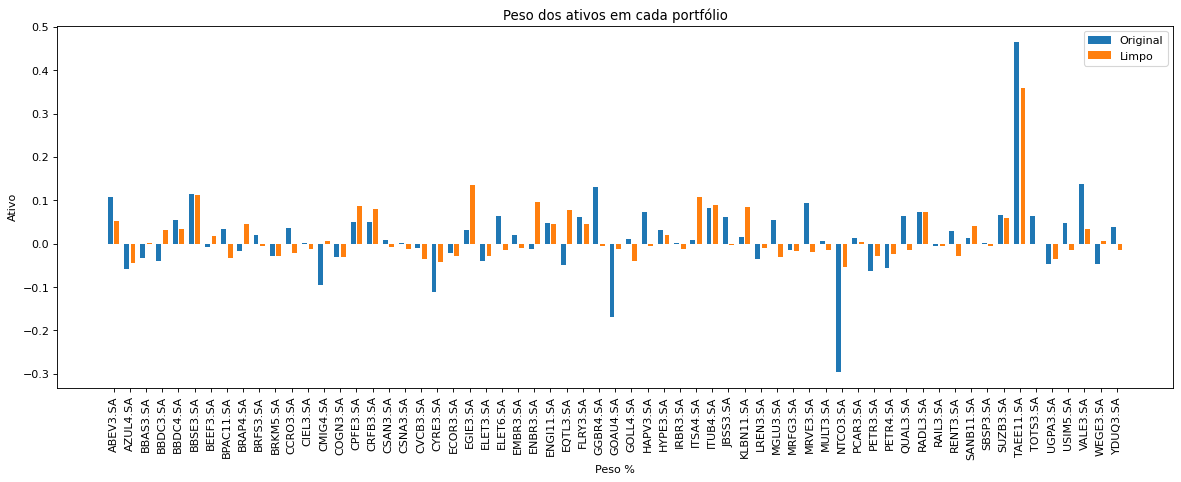

In [14]:
#print(f"Vol Esperada Orignal: {vol_orig:.2%}")
#print(f"Vol Esperada Limpa: {vol_clean:.2%}")

pesoMedia = (pesos_orig.sum())/(len(pesos_orig))

X_axis = np.arange(len(retData_train.columns))

plt.figure(figsize=(18, 6), dpi=80)

plt.bar(X_axis - 0.2, pesos_orig, 0.3, label = 'Original')
plt.bar(X_axis + 0.2, pesos_clean, 0.3, label = 'Limpo')

  
plt.xticks(X_axis, retData_train.columns)
plt.xlabel("Peso %")
plt.ylabel("Ativo")
plt.xticks(rotation=90)
plt.title("Peso dos ativos em cada portfólio")
plt.legend()
plt.show();

In [15]:
pesos_sample, vol_sample = minVarPort(retData_test.corr(), retData_test.std())
vol_sample

0.11364531290107358

In [16]:
mvOrig = (retData_test * pesos_orig).sum()
mvClean = (retData_test * pesos_clean).sum()
mvSample = (retData_test * pesos_sample).sum()

print(f"Vol Real Original: {mvOrig.std()*np.sqrt(252):.2%}")
print(f"Vol Real Limpa: {mvClean.std()*np.sqrt(252):.2%}")
print(f"Vol Real Dentro da Amostra: {mvSample.std()*np.sqrt(252):.2%}")

Vol Real Original: 72.66%
Vol Real Limpa: 33.63%
Vol Real Dentro da Amostra: 26.84%


In [17]:
detonData = cov2corr(detonMatrix(retData_train)) # Não é uma matriz de correlação verdadeira, precisa ser normalizada para ter a diagonal igual a 1
detonData

,ABEV3.SA,AZUL4.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BPAC11.SA,BRAP4.SA,BRFS3.SA,...,SANB11.SA,SBSP3.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,WEGE3.SA,YDUQ3.SA
ABEV3.SA,1.000000,0.010945,-0.116757,0.054194,0.063995,0.025700,-0.035213,-0.120772,-0.151366,-0.002240,...,0.066813,-0.036059,0.047477,-0.048729,-0.129248,0.018120,-0.100455,-0.196671,0.104385,0.055476
AZUL4.SA,0.010945,1.000000,-0.015939,-0.078727,-0.037350,-0.176051,-0.087938,-0.030467,-0.120207,-0.070902,...,0.038463,-0.127297,-0.017275,-0.102650,-0.014391,-0.088181,-0.009312,-0.108971,0.006471,0.053626
BBAS3.SA,-0.116757,-0.015939,1.000000,0.597570,0.609971,0.132386,-0.214364,-0.037410,-0.039004,-0.123471,...,0.450728,0.051734,-0.222961,-0.055094,-0.141472,-0.038569,0.003415,-0.007598,-0.225390,-0.099799
BBDC3.SA,0.054194,-0.078727,0.597570,1.000000,0.890569,0.191152,-0.210592,0.011152,-0.011776,-0.124726,...,0.594277,-0.041041,-0.169423,-0.105368,-0.265131,-0.038385,-0.046577,-0.026134,-0.227470,-0.129317
BBDC4.SA,0.063995,-0.037350,0.609971,0.890569,1.000000,0.138799,-0.207377,-0.005309,-0.041207,-0.081401,...,0.619562,-0.077878,-0.135056,-0.124281,-0.278224,-0.036320,-0.064342,-0.025426,-0.277377,-0.152809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UGPA3.SA,0.018120,-0.088181,-0.038569,-0.038385,-0.036320,0.002234,-0.018540,0.015266,0.006329,-0.047633,...,-0.061748,-0.027370,-0.029776,0.095193,-0.047626,1.000000,-0.020889,0.016014,-0.087559,-0.033919
USIM5.SA,-0.100455,-0.009312,0.003415,-0.046577,-0.064342,-0.105903,-0.034384,-0.076816,0.283881,-0.110755,...,-0.062628,-0.027216,0.146801,-0.152040,-0.053128,-0.020889,1.000000,0.285700,-0.090620,-0.072722
VALE3.SA,-0.196671,-0.108971,-0.007598,-0.026134,-0.025426,-0.066660,0.100856,-0.030994,0.874931,0.048326,...,0.008889,-0.110161,0.178345,-0.087547,-0.046369,0.016014,0.285700,1.000000,-0.089549,-0.162208
WEGE3.SA,0.104385,0.006471,-0.225390,-0.227470,-0.277377,-0.031768,0.119545,-0.075627,-0.015529,0.043465,...,-0.148315,-0.115425,0.132412,0.050469,0.179606,-0.087559,-0.090620,-0.089549,1.000000,-0.013131


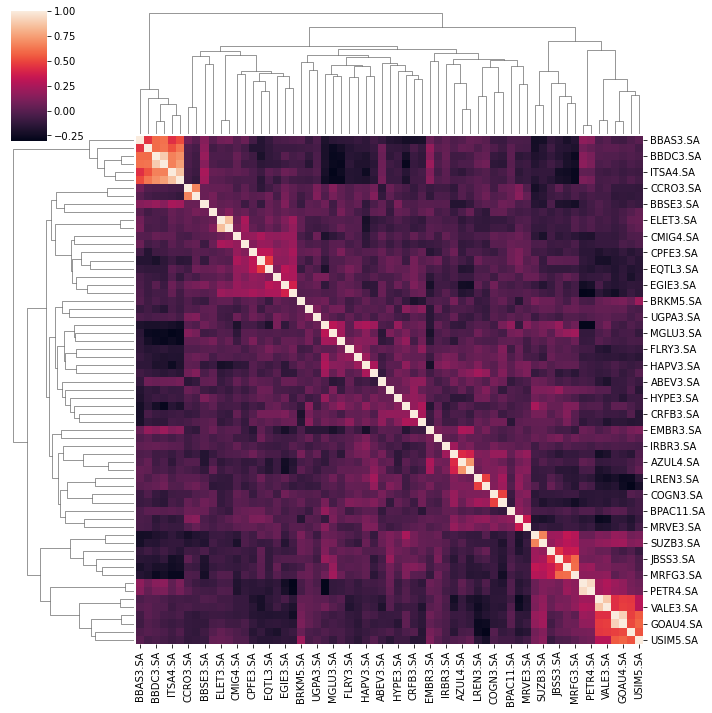

In [18]:
h_deton = sns.clustermap(detonData)
h_deton
plt.show();

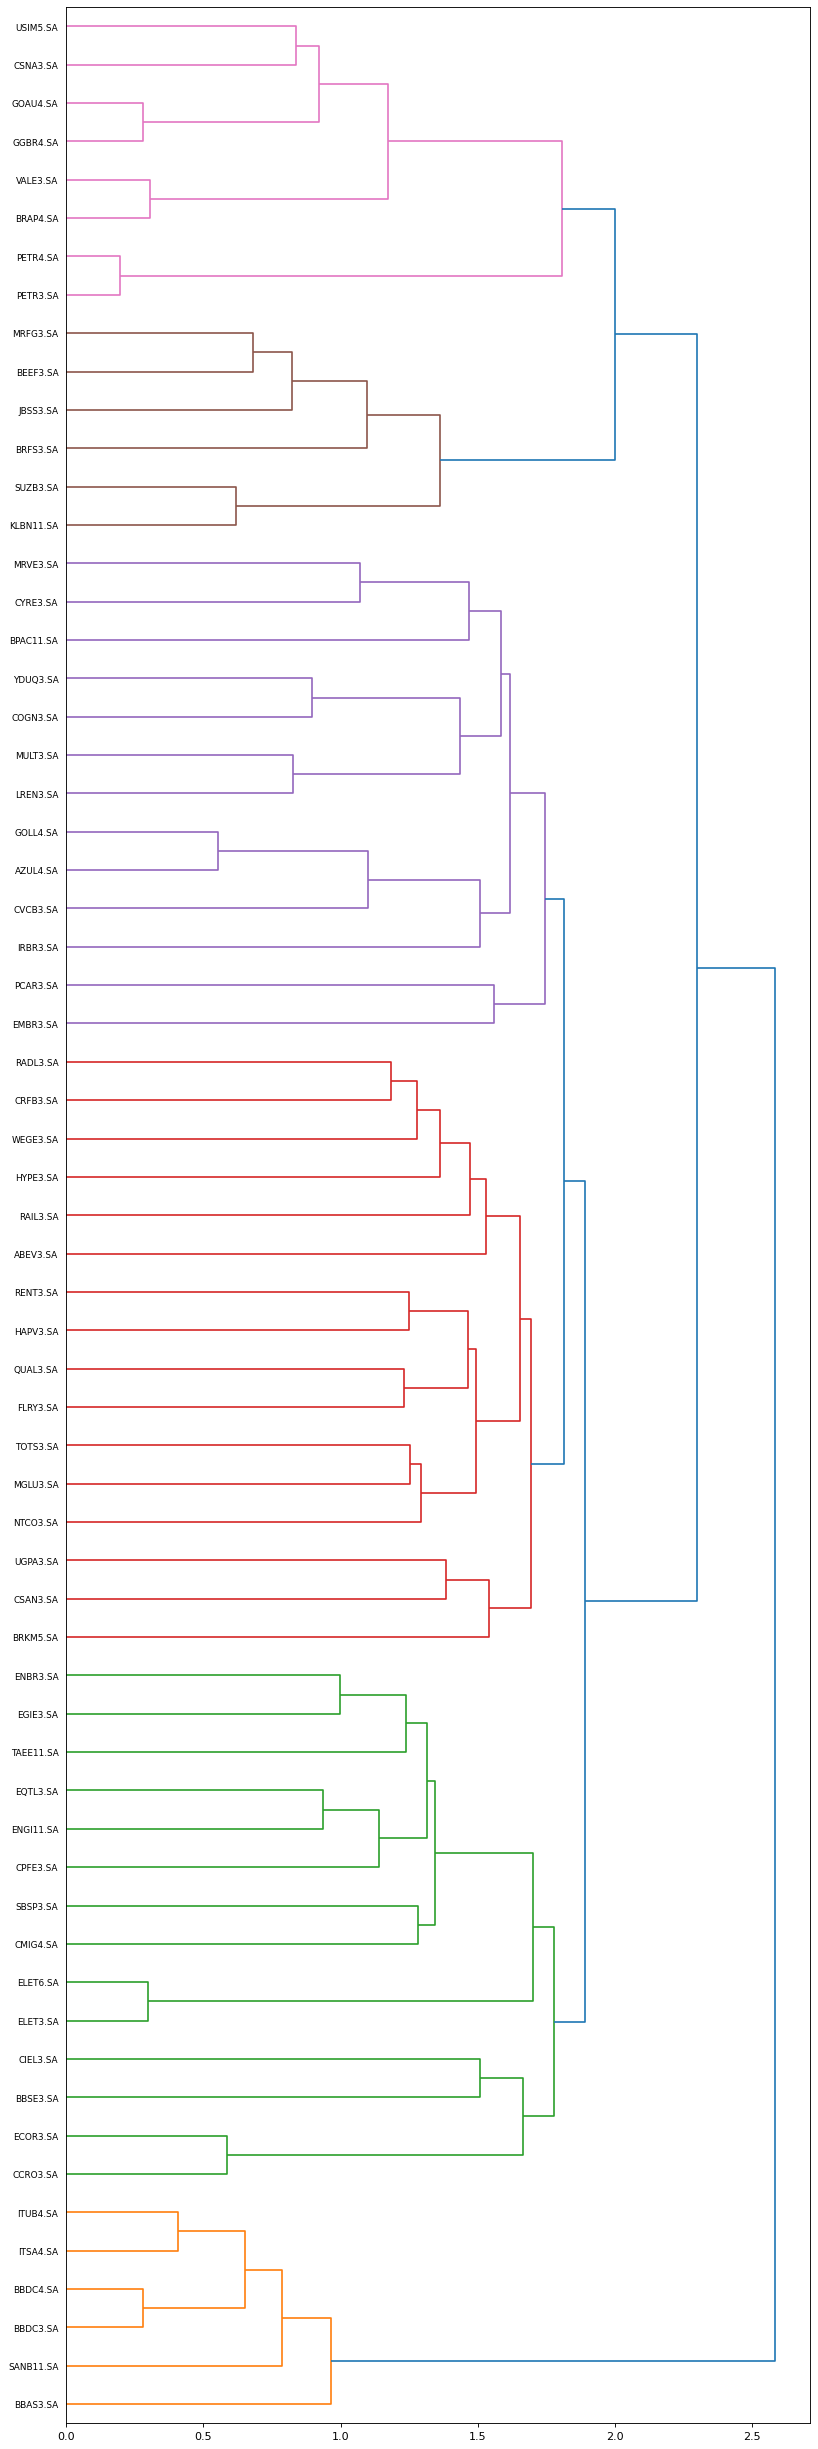

In [19]:
dgram_deton = h_deton.dendrogram_col.dendrogram
row_linkage_deton = h_deton.dendrogram_row.linkage
plt.figure(figsize=(12, 40), dpi=80)
dn_deton = dendrogram(row_linkage_deton, labels = retData_train.columns, orientation='right', leaf_font_size=8)

In [20]:
import scipy.cluster.hierarchy as sch
import numpy as np
import radialtree as rt
import matplotlib

numleaf = 10

labels = retData_test.columns



# Compute and plot the dendrogram.
#Y = sch.linkage(row_linkage_new, method='single')
#Z2 = sch.dendrogram(Y,labels=retData_train.columns[:-1], no_plot=True)
dn_det = dendrogram(row_linkage_deton, labels = row_linkage_deton.columns, orientation='left', leaf_font_size=30, no_plot=True, color_threshold=0)
# plot a circular dendrogram


ax = rt.plot(dn_det, fontsize=20, show=False, addlabels=True, figsize=(30, 30), pallete='gist_rainbow',  lwidth = 2)
ax.figure.savefig('cc11.png', transparent=True)

ModuleNotFoundError: No module named 'radialtree'